## Data Preprocessing

In [1]:
# Import Libraries
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import urllib.request
import pickle

In [ ]:
data = pickle.load(urllib.request.urlopen('https://github.com/endgameinc/homoglyph/blob/master/data/process_spoof.pkl?raw=true'))

In [ ]:
data

{'test': [('asutil.exe', 'qsutiin.exe', 1.0),
  ('WINDOWSXP-KB2779030-X86-PTB.EXE', 'windowsxp-kb2779030-x86-ell.exe', 0.0),
  ('agt0404.dll', 'agt0415.dll', 0.0),
  ('RLFRG256.DLL', 'rlƒřȑg256l.dll', 1.0),
  ('apconfig.exe', 'àpĉoņfig.exe', 1.0),
  ('ACE2.EXE', 'alce2.exe', 1.0),
  ('msadce.pdb.dll', 'msadce.pdƀ.dll', 1.0),
  ('divx_enc_aac.dll', 'divx_dec_avc.dll', 0.0),
  ('deu_adencrypt.dll', 'chs_adencrypt.dll', 0.0),
  ('astransd.dll', 'astransdl.dll', 1.0),
  ('D2INF709.DLL', 'd2inf509.dll', 0.0),
  ('IE7-WindowsXP-KB3003057-x86-Embedded-ENU.exe',
   'ie7-winddowsxp-kb3003057-x86-embedded-enu.exe',
   1.0),
  ('sprdrdei.exe', 'sprdŗdėì.exe', 1.0),
  ('Vsavb7rtUI.NL.dll', 'vsavb7rtui.ņl.dll', 1.0),
  ('RemoteIn.exe', 'remo7-ein.exe', 1.0),
  ('WINDOWSXP-KB2675157-X86-JPN.EXE',
   'windoowwsxp-kb2675157-x86-jpn.exe',
   1.0),
  ('RRUPDATE.DLL', 'caupdate.dll', 0.0),
  ('NPJPI142_01.dll', 'ņpjþi142_01.dll', 1.0),
  ('beatnik-actionset-122-dw.exe', 'ƀeatnik-actionseț-122-dw.exe', 1.

In [ ]:
font = '/content/ARIAL.TTF'

In [ ]:
def img(text, path):     
    img = Image.new('L', (150, 12))
    fnt = ImageFont.truetype(font, 10)
    d = ImageDraw.Draw(img)
    d.text((0, 0), text, font=fnt, fill = (255))
    enhancer = ImageEnhance.Contrast(img)
    im_output = enhancer.enhance(1.5)
    #transposed  = img.transpose(Image.ROTATE_90)
    im_output.save(path + text + '.png', 'PNG')

In [ ]:
data['train'][0][2]

1.0

In [ ]:
train = [real[0] for real in data['train'] if real[2] == 0.0]
test = [real[0] for real in data['test'] if real[2] == 0.0]
valid = [real[0] for real in data['validate'] if real[2] == 0.0]

In [ ]:
uniq_train = list(set(train))
uniq_test = list(set(test))
uniq_valid = list(set(valid))

In [ ]:
print(len(uniq_train), len(uniq_test), len(uniq_valid))

83803 49711 44141


In [ ]:
with open("real_train.txt", "wb") as fp:
    pickle.dump(uniq_train, fp)

with open("real_test.txt", "wb") as fp:
    pickle.dump(uniq_test, fp)

with open("real_valid.txt", "wb") as fp:
    pickle.dump(uniq_valid, fp)

In [ ]:
with open("real_train.txt", "rb") as fp:
    real_train = pickle.load(fp)

In [ ]:
with open("real_test.txt", "rb") as fp:
    real_test = pickle.load(fp)

In [ ]:
with open("real_valid.txt", "rb") as fp:
    real_valid = pickle.load(fp)

In [ ]:
real_train

['WINDOWSXP-KB2570222-X86-DAN.EXE',
 'Rhudlafr.dll',
 'CNHL160.DLL',
 'LTSCR14n.dll',
 'BOOTEDIT.EXE',
 'download_serial.dll',
 'libiepcf90md.dll',
 'eularesfr_FR.dll',
 'orajox8sun_net_smtp.dll',
 'file_VBoxREM.dll',
 'Q256854_W2K_SP1_X86_TW.EXE',
 'pctrlpor.dll',
 'spe1602.dll',
 'BSLITEINSTALL521.exe',
 'rssub.pdb.dll',
 'cnbf620.pdb.dll',
 'libgd.dll',
 'usrcomm.dll',
 'FXTLS130.DLL',
 'WINDOWSSERVER2003-KB2535512-X86-RUS.EXE',
 'mm8trn.exe',
 'capiprovider.dll',
 'LXAA1drs.dll',
 'WINDOWSSERVER2003-KB837363-X86-ENU.EXE',
 'ChartFX.WinForms.Exporter.exe',
 'mufin_player_2_de-DE_setup.exe',
 'ENROLL_WINCE5.0_ARM.EXE',
 'HCSETUP.EXE',
 'JascToolBaseRC.dll',
 'og61cqas.dll',
 'NotesUI.dll',
 'R167328.EXE',
 'WINDOWSSERVER2003.WINDOWSXP-KB2525694-X64-RUS.EXE',
 'WINDOWSXP-SP2-WINDOWSMEDIA-KB975558-X86-CSY.EXE',
 'PE1855BmcA02.exe',
 'IETTFintl110.dll',
 'microsoft.visualbasic.pdb.dll',
 'DBWRITER.DLL',
 'shl62.dll',
 'dotnetfx35langpack_ia64ja.exe',
 'Scanning.exe',
 'CrashReporter.exe

In [ ]:
print(len(real_train), len(real_valid), len(real_test))

83803 44141 49711


In [ ]:
import os
os.mkdir('real_pics')
os.mkdir('real_pics/train')
os.mkdir('real_pics/test')
os.mkdir('real_pics/valid')

In [ ]:
for real in real_train:
    img(real, 'real_pics/train/')

In [ ]:
for real in real_test:
    img(real, 'real_pics/test/')

In [ ]:
for real in real_valid:
    img(real, 'real_pics/valid/')

In [ ]:
train = [fake[1] for fake in data['train'] if fake[2] == 1.0]
test = [fake[1] for fake in data['test'] if fake[2] == 1.0]
valid = [fake[1] for fake in data['validate'] if fake[2] == 1.0]

In [ ]:
train

['ophcht.dll',
 'pqƀoőtẍ.exe',
 'mic2omnm.exe',
 'hellphttty.dll',
 'šam-pleu_nstuff.exe',
 'cs_gooģledriveserviceresoµrces.dll',
 'rlņìŧ.dll',
 'mr_akern.exe',
 'ciĺin94.exe',
 'fzintegration.ẍ64.9.dll',
 'windowsserver2003.windoẁsxp-kb2544893-v2-x64-enu.exe',
 'wyndowsxp-sp2-windowŝmedia-kb975558-x86-trk.exe',
 'imexpērţ.dll',
 'windowsserver2003.ẃinƌowsxp-kb_2619339-x64-enu.exe',
 'c_ſudb16b.dll',
 'gvuntviewer.exe',
 'tẃ_cloudměservice.resourcês.dll',
 'ɱmsmddo00.dll',
 'frft_iosţress_dir3mkțropcl.exe',
 'cħapter1303.exe',
 'freeicdsetùp.exe',
 'rrunieck.exe',
 'helpsetupl_px86_chs.exe',
 'vrvųn300.exe',
 'wnrėco32.dll',
 'p2sodƀc.dll',
 'it_sugarsyncservice.resourcesy.dll',
 'abiuţìľ.exe',
 'ɱwŋdb.dbg.dll',
 'freeċaɱ.exe',
 'rasddii.dll',
 '_a-cipcnfg.exe',
 'getadminporu.exe',
 'rro_kcfg.dll',
 'awrpaltoa.dll',
 'windowsserver2003-kb2742604-x86-fră.exe',
 'c12_ex0ress_roxio_photoshow_ʂetup.exe',
 'wɍițě.exe',
 'ie7-windŏwsxp-kƀ2482017-x86-sve.exe',
 'ado×cedt11g.dll',
 'aldaemŏn.

In [ ]:
print(len(list(set(train))), len(list(set(test))), len(list(set(valid))))

677675 178410 35669


In [ ]:
uniq_train = list(set(train))[:83803]
uniq_test = list(set(test))[:49711]
uniq_valid = list(set(valid))[:44141]

In [ ]:
print(len(uniq_train), len(uniq_test), len(uniq_valid))

83803 49711 35669


In [ ]:
with open("fake_train.txt", "wb") as fp:
    pickle.dump(uniq_train, fp)

with open("fake_test.txt", "wb") as fp:
    pickle.dump(uniq_test, fp)

with open("fake_valid.txt", "wb") as fp:
    pickle.dump(uniq_valid, fp)

In [ ]:
with open("fake_train.txt", "rb") as fp:
    fake_train = pickle.load(fp)

In [ ]:
with open("fake_test.txt", "rb") as fp:
    fake_test = pickle.load(fp)

In [ ]:
with open("fake_valid.txt", "rb") as fp:
    fake_valid = pickle.load(fp)

In [ ]:
os.mkdir('fake_pics')
os.mkdir('fake_pics/train')
os.mkdir('fake_pics/test')
os.mkdir('fake_pics/valid')

In [ ]:
for fake in fake_train:
    img(fake,'fake_pics/train/')

In [ ]:
for fake in fake_test:
    img(fake,'fake_pics/test/')

In [ ]:
for fake in fake_valid:
    img(fake,'fake_pics/valid/')

In [ ]:
os.mkdir('final_train')
os.mkdir('final_train/real')
os.mkdir('final_train/fake')

os.mkdir('final_valid')
os.mkdir('final_valid/real')
os.mkdir('final_valid/fake')

os.mkdir('final_test')
os.mkdir('final_test/real')
os.mkdir('final_test/fake')

In [ ]:
import os
from os import path
import shutil

src = "real_pics/train/"
dst = "final_train/real/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import os
from os import path
import shutil

src = "real_pics/test/"
dst = "final_train/real/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import os
from os import path
import shutil

src = "fake_pics/train/"
dst = "final_train/fake/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import os
from os import path
import shutil

src = "fake_pics/test/"
dst = "final_train/fake/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import os
from os import path
import shutil

src = "real_pics/valid/"
dst = "final_valid/real/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import os
from os import path
import shutil

src = "fake_pics/valid/"
dst = "final_valid/fake/"

cnt = 0
#files = [i for i in os.listdir(src) if i.startswith("CTASK") and path.isfile(path.join(src, i))]
files = [i for i in os.listdir(src)]
for f in files:
        shutil.copy(path.join(src, f), dst)

In [ ]:
import tensorflow as tf

In [ ]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the only change is that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc', tf.keras.metrics.AUC()])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    'final_train',
    target_size=(256, 256), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    'final_valid',
    target_size=(256, 256),
    batch_size=50,
    class_mode='binary')

Found 226125 images belonging to 2 classes.
Found 79810 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=500, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
500/500 [==============================] - 43s 86ms/step - loss: 0.3728 - acc: 0.8159 - auc: 0.8906 - val_loss: 0.3232 - val_acc: 0.8356 - val_auc: 0.9320
Epoch 2/30
500/500 [==============================] - 41s 81ms/step - loss: 0.3033 - acc: 0.8537 - auc: 0.9276 - val_loss: 0.2696 - val_acc: 0.8578 - val_auc: 0.9503
Epoch 3/30
500/500 [==============================] - 41s 82ms/step - loss: 0.2723 - acc: 0.8685 - auc: 0.9418 - val_loss: 0.2657 - val_acc: 0.8611 - val_auc: 0.9543
Epoch 4/30
500/500 [==============================] - 40s 81ms/step - loss: 0.2596 - acc: 0.8760 - auc: 0.9469 - val_loss: 0.2479 - val_acc: 0.8713 - val_auc: 0.9596
Epoch 5/30
500/500 [==============================] - 41s 83ms/step - loss: 0.2546 - acc: 0.8750 - auc: 0.9496 - val_loss: 0.2428 - val_acc: 0.8640 - val_auc: 0.9616
Epoch 6/30
500/500 [==============================] - 40s 80ms/step - loss: 0.2444 - acc: 0.88

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

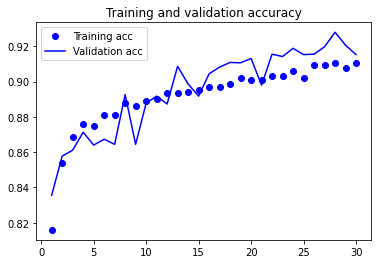

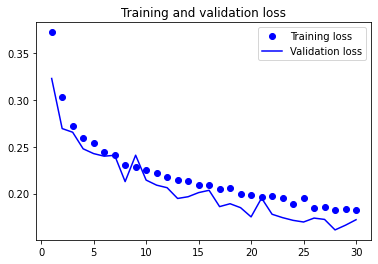

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
cdnc